# Homework 1
The distribution that we are trying to sample from does not have a CDF that is easily invertible
$$
\begin{aligned}
f(x)&=6x(1-x)\\
CDF_f(x)&=3x^2-2x^3\\
\end{aligned}
$$
We can use a proposal distribution that is easier to sample from
$$
\begin{aligned}
g(x)&=\frac{\pi}{2}\sin\pi x\\
CDF_g(x)&=\frac{-1}{2}(\cos\pi x-1)\\
\end{aligned}
$$
We can sample from $g$ using the inverse CDF
$$
\begin{aligned}
u&\sim\text{Uniform}(0,1)\\
x&=\frac{1}{\pi}\cos^{-1}(1-2u)
\end{aligned}
$$

In [116]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
%matplotlib inline

seed = 0
rn.seed(seed)

def f(x):
    return 6 * x * (1-x)

def CDF_f(x):
    return 3 * x ** 2 - 2 * x ** 3

def g(x):
    return np.pi / 2 * np.sin(np.pi * x)

def CDF_g(x):
    return -(np.cos(np.pi * x) - 1)/2 

def invCDF_g(u):
    return np.arccos(1 - 2 * u) / np.pi

def sample_g():
    return invCDF_g(rn.random())

def hist_with_error(x, n_bins=35, theoretical=f):
    y, bin_edges, patches = plt.hist(x, bins=n_bins)
    n, c = np.histogram(x, bins=n_bins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    
    L = len(x)
    p = n / L
    err = p * (1 - p) * np.sqrt(L)
    
    plt.errorbar(
        bin_centers,
        y,
        yerr = err,
        fmt = '.'
    )
    
    th = theoretical(bin_centers) * L / n_bins
    plt.plot(bin_centers, th, linewidth=5, alpha=0.5)
    print('Bins out of range: {}'.format(sum((th > y + err) | (th < y - err))/n_bins))

# First we try to find M 
Since both $f$ and $g$ have support on $[0,1]$, and have negative curvature. We can find their derivatives at $x=0$ and $x=1$ and make sure that $f'(0)\leq Mg'(0)$ and $f'(1)\geq Mg'(1)$. Since they're both symmetric around 0.5, we can just check this condition on one of the end points.

$$
\begin{aligned}
\frac{d}{dx}f(x)\bigg|_0&=6\\
\frac{d}{dx}g(x)\bigg|_0&=\frac{\pi^2}{2}\\
\Rightarrow M &= f'(0)/g'(0) = \frac{12}{\pi^2}
\end{aligned}
$$

To make sure that that this is good, we plot $f(x)$ and $Mg(x)$

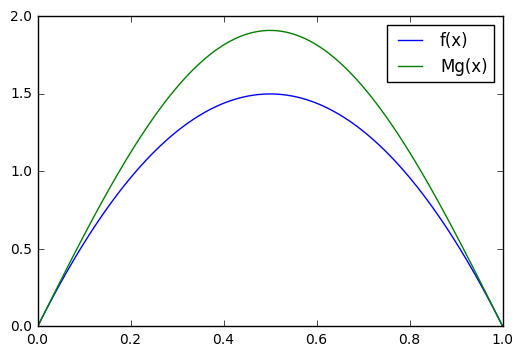

In [124]:
M = 12 / np.pi ** 2

x = np.linspace(0,1,100)
fx = f(x)
Mgx = M * g(x)

plt.plot(x, fx)
plt.plot(x, Mgx)
plt.legend(['f(x)', 'Mg(x)'])

# Now we draw samples

In [135]:
def sample_f():
    y = sample_g()
    u = rn.random()
    if (u < f(y) / (M * g(y))):
        return y
    else:
        return sample_f()

In [136]:
s = np.array([sample_f() for _ in range(0,10000)])

Bins out of range: 0.8571428571428571


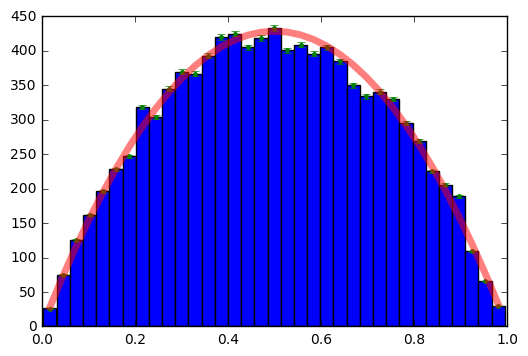

In [139]:
hist_with_error(s)